In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Data/ffELAlevit.csv")
df.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,375,376,377,378,379,380,381,382,383,label
0,0,-0.673491,2.144851,2.943356,-2.495420,0.025860,-1.584043,0.578942,-4.435777,-1.307266,...,16.184618,-0.528168,2.249890,-1.723533,2.575449,2.432524,-4.546911,-3.285306,-0.584727,0
1,1,-1.535498,1.305017,2.912420,-1.234388,0.133793,0.582892,0.179327,-3.964306,-1.219192,...,4.650995,-0.418726,2.637130,-2.163777,3.016020,0.509064,-1.805195,0.545950,-1.400590,0
2,2,1.036813,0.700364,2.935562,0.498884,0.056583,-0.397434,0.099240,-4.507691,-2.821361,...,-1.488762,1.359984,2.162955,-0.393316,4.235519,1.089137,-0.598765,1.187651,-0.400259,0
3,3,-0.772012,4.177879,2.883830,-4.836596,1.467832,-0.738371,-1.076588,-2.347811,-3.073751,...,-0.401770,6.044688,3.374573,1.483035,2.074169,0.264310,0.505018,1.150005,0.950212,0
4,4,1.283624,2.853565,1.393960,1.387873,2.037778,1.295402,0.715115,-3.412489,0.550945,...,7.141971,0.826257,2.472068,1.435246,-1.938534,-2.706954,-1.065464,-1.144256,3.021189,0


In [3]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,label
0,-0.673491,2.144851,2.943356,-2.495420,0.025860,-1.584043,0.578942,-4.435777,-1.307266,4.051661,...,16.184618,-0.528168,2.249890,-1.723533,2.575449,2.432524,-4.546911,-3.285306,-0.584727,0
1,-1.535498,1.305017,2.912420,-1.234388,0.133793,0.582892,0.179327,-3.964306,-1.219192,3.355551,...,4.650995,-0.418726,2.637130,-2.163777,3.016020,0.509064,-1.805195,0.545950,-1.400590,0
2,1.036813,0.700364,2.935562,0.498884,0.056583,-0.397434,0.099240,-4.507691,-2.821361,1.026243,...,-1.488762,1.359984,2.162955,-0.393316,4.235519,1.089137,-0.598765,1.187651,-0.400259,0
3,-0.772012,4.177879,2.883830,-4.836596,1.467832,-0.738371,-1.076588,-2.347811,-3.073751,3.995402,...,-0.401770,6.044688,3.374573,1.483035,2.074169,0.264310,0.505018,1.150005,0.950212,0
4,1.283624,2.853565,1.393960,1.387873,2.037778,1.295402,0.715115,-3.412489,0.550945,3.056936,...,7.141971,0.826257,2.472068,1.435246,-1.938534,-2.706954,-1.065464,-1.144256,3.021189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818,0.948188,2.720704,0.904566,-4.194624,0.775379,-1.311566,1.211501,-1.842699,-1.205468,2.183934,...,6.738371,-0.133126,2.345166,-0.146946,-2.588622,-1.339916,0.865193,-3.575434,0.877878,1
33819,-1.203070,2.935790,2.330756,-5.057401,0.241188,-0.147361,0.771065,-1.270168,-3.900552,2.168812,...,8.379229,-1.005754,1.885134,0.219508,0.216309,-3.628203,0.698202,-0.484356,0.529978,1
33820,-1.814235,2.399244,3.185710,-4.319982,0.278509,-1.800483,-0.104002,-1.511690,-4.780692,3.215323,...,6.842797,-1.746397,2.126374,1.787110,0.609456,-4.010444,0.430112,-0.852324,0.614817,1
33821,-1.551973,2.636613,3.429140,-4.585017,-0.133380,-1.550102,0.353648,-2.485747,-3.422147,2.705098,...,7.236370,-0.573921,2.118029,2.824709,0.601071,-3.273966,0.994632,0.311314,1.155948,1


In [14]:
df=pd.read_csv("../Data/fflevit.csv")
df.head()
df=df.drop(columns=["Unnamed: 0"],axis=1)

X=df.drop(columns=["label"],axis=1)
y=df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

model=Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

y_pred = model.predict(X_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/50
677/677 [==============================] - 1s 1ms/step - loss: 0.4749 - accuracy: 0.7723 - val_loss: 0.3485 - val_accuracy: 0.8522
Epoch 2/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2734 - accuracy: 0.8919 - val_loss: 0.2770 - val_accuracy: 0.8816
Epoch 3/50
677/677 [==============================] - 1s 1ms/step - loss: 0.2131 - accuracy: 0.9167 - val_loss: 0.2296 - val_accuracy: 0.9091
Epoch 4/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1818 - accuracy: 0.9301 - val_loss: 0.2609 - val_accuracy: 0.8943
Epoch 5/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1654 - accuracy: 0.9348 - val_loss: 0.2207 - val_accuracy: 0.9229
Epoch 6/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1415 - accuracy: 0.9460 - val_loss: 0.2007 - val_accuracy: 0.9222
Epoch 7/50
677/677 [==============================] - 1s 1ms/step - loss: 0.1330 - accuracy: 0.9472 - val_loss: 0.2599 - val_accuracy: 0.8978
Epoch 

In [ ]:
df1=pd.read_csv("../Data/celebdfLeViT.csv")
df1.head()
df1=df1.drop(columns=["Unnamed: 0"],axis=1)

X=df1.drop(columns=["label"],axis=1)
y=df1.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model1=Sequential()

model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model1.add(Dense(32, activation='relu'))  
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1=model1.fit(X_train,y_train,epochs=50,validation_split=0.2)

y_pred = model1.predict(X_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/50
681/681 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7247 - val_loss: 0.4428 - val_accuracy: 0.7780
Epoch 2/50
681/681 [==============================] - 1s 1ms/step - loss: 0.3734 - accuracy: 0.8304 - val_loss: 0.3887 - val_accuracy: 0.8243
Epoch 3/50
681/681 [==============================] - 1s 1ms/step - loss: 0.3112 - accuracy: 0.8619 - val_loss: 0.3333 - val_accuracy: 0.8484
Epoch 4/50
681/681 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.8785 - val_loss: 0.3265 - val_accuracy: 0.8594
Epoch 5/50
681/681 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.8926 - val_loss: 0.3159 - val_accuracy: 0.8607
Epoch 6/50
681/681 [==============================] - 1s 1ms/step - loss: 0.2215 - accuracy: 0.9061 - val_loss: 0.2883 - val_accuracy: 0.8784
Epoch 7/50
681/681 [==============================] - 1s 1ms/step - loss: 0.2057 - accuracy: 0.9122 - val_loss: 0.2862 - val_accuracy: 0.8815
Epoch 

In [ ]:
def plot(history, name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.title(name + " Training and Validation Accuracy Results")
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.title(name + " Training and Validation Loss Results")
    plt.show()

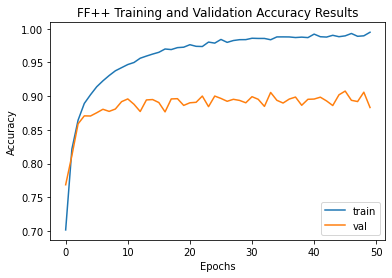

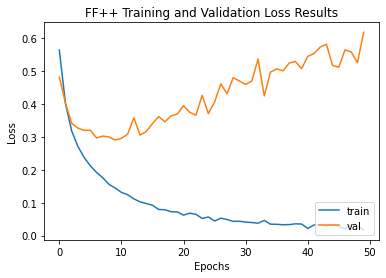

In [ ]:
plot(history,"FF++")

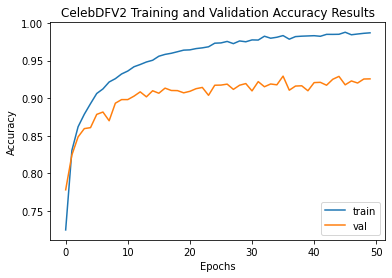

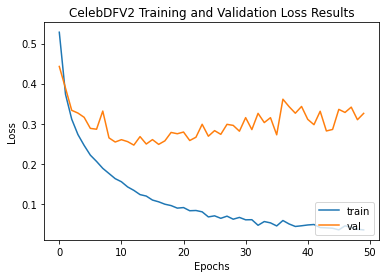

In [ ]:
plot(history1,"CelebDFV2")

In [9]:
from keras.layers import Dense, GRU

In [11]:
df=pd.read_csv("../Data/ffELAlevit.csv")
df.head()

X=df.drop(columns=["label"],axis=1)
y=df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

model3=Sequential()

model3.add(GRU(32, input_shape=(X_train.shape[1], 1)))  
model3.add(Dense(16, activation='relu'))  
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model3.fit(X_train,y_train,epochs=50,validation_split=0.2)

y_pred = model3.predict(X_test)

# Convert predictions to binary values
y_pred_binary = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/50
185/677 [=======>......................] - ETA: 46s - loss: 0.6875 - accuracy: 0.5422

KeyboardInterrupt: 